# Random Forest Classification

**Random Forest** classification uses the exact same idea as **Random Forest** regression, using **Decision Tree Classification** instead of **Decision Tree Regression**. The steps are also the exact same:

### Steps

1. Pick K random data points from the training set.
2. Build the decision tree associated with these K data points.
3. Repeat steps 1 and 2 for N number of decision trees.
4. Make a prediction for a by using the most occuring classification produced by the N decision trees.

<hr>

## Code

__Setting up the Dataset:__

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('Social_Network_Advertisements.csv')
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

<hr>

__Fitting the Classifier & Making Predictions__

In [2]:
# Fitting classifier to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

VERTICAL_ALIGNMENT = 1;
np.concatenate((
    y_pred.reshape(len(y_pred), VERTICAL_ALIGNMENT),
    y_test.reshape(len(y_pred), VERTICAL_ALIGNMENT)
    ), VERTICAL_ALIGNMENT)

array([[0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 0],
       [1, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 1],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 0],
       [1, 1],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [0,

<hr>

__Creating the Confusion Matrix:__

In [3]:
from sklearn.metrics import confusion_matrix, accuracy_score

print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[63  5]
 [ 4 28]]
0.91


<hr>

__Visualizing Training Results:__

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


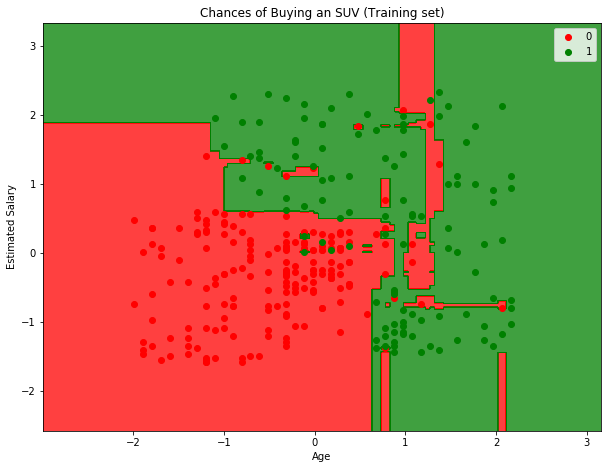

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


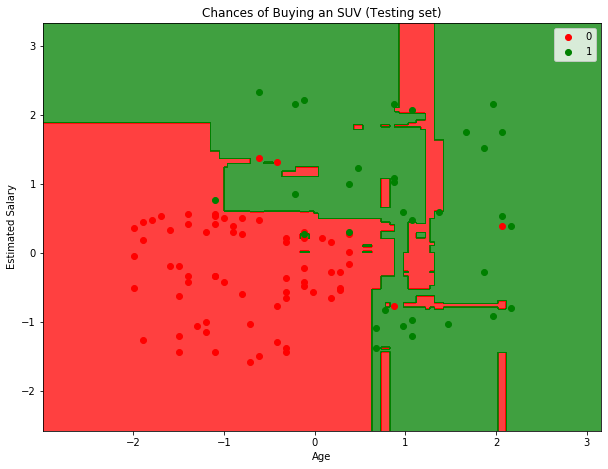

In [4]:
# Graph Scaling
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 7.5

#Classification Visualizer function:
def display(X_set, y_set, type):
    from matplotlib.colors import ListedColormap
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                         np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
    plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha = 0.75, cmap = ListedColormap(('red', 'green')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for index, value in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == value, 0], X_set[y_set == value, 1],
                    c = ListedColormap(('red', 'green'))(index), label = value)
        
    plt.title('Chances of Buying an SUV (' + type + ' set)')
    plt.xlabel('Age')
    plt.ylabel('Estimated Salary')
    plt.legend()
    plt.show()

#Displaying the results for the training and test sets.
display(X_train, y_train, 'Training')
display(X_test, y_test, 'Testing')

__Results:__
<br>
The resulting graph using the **Random Forest** classification is even more detailed than **Decision Tree** classification because there are 10 trees predicting the classification of a datapoint. This demonstrates how a balance needs to be found between improving prediction accuracy and overfitting the data.